In [179]:
import pandas as pd
import os
import shutil
import numpy as np
import re
import seaborn as sns
import cv2
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
#from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import splitfolders



In [180]:

data_original = os.listdir('/Users/nicco/Desktop/ADA_project/cars dataset')
image_df = pd.DataFrame(data_original,columns=['Image'])
sel = image_df[['Image']]
image_df = pd.concat([image_df, sel],axis=1)
image_df.columns = ['Copy', 'Image']
image_df
image_df['check'] = np.where(image_df['Image'] == image_df['Copy'], True, False)
image_df

cars_df = image_df['Copy'].str.split("_", n=16, expand = True)
cars_df = pd.concat([cars_df, image_df], axis=1)

cars_df.drop(cars_df.iloc[:, 3:15], inplace = True, axis = 1)
cars_df.drop(16, inplace = True, axis = 1)
cars_df.drop('Copy', inplace = True, axis = 1)
cars_df.drop('check', inplace = True, axis = 1)
cars_df.columns = ['brand', 'model', 'year', 'car_type', 'img_id']

removed_brands = [".DS","Acura", "Dodge", "Lincoln", "Genesis", 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Ferrari', 'GMC',
'INFINITI', 'Lamborghini', 'McLaren', 'Rolls-Royce']

removed_car_types = ["Pickup", "3dr", "nan", "Van", "Station Wagon"]

for a in removed_brands:

    cars_df.drop(cars_df[cars_df['brand'] == a].index, inplace = True)

for b in removed_car_types:
    cars_df.drop(cars_df[cars_df['car_type'] == b].index, inplace = True)

#cars_df['new_id'] = cars_df['brand']+"_"+cars_df['model']+"_"+cars_df['year']+"_"+cars_df['car_type']+".jpg" #New variable containing the new filenames for pictures
cars_df.reset_index(drop=True)

cars_df

cars_df.to_csv('Cars_dataset_final.csv', encoding='utf-8')
print(cars_df)

            brand     model  year     car_type  \
0            Ford      Flex  2010          4dr   
2          Nissan    Maxima  2011          4dr   
5           Lexus        IS  2019          4dr   
6          Jaguar    F-Type  2017  Convertible   
8          Subaru    Legacy  2020          4dr   
...           ...       ...   ...          ...   
64460         Kia  Sportage  2019          SUV   
64462      Subaru  Forester  2016          SUV   
64464     Porsche       718  2019  Convertible   
64465      Subaru   Outback  2016          SUV   
64466  Volkswagen    Tiguan  2019          SUV   

                                                  img_id  
0      Ford_Flex_2010_39_19_260_35_6_75_68_201_16_AWD...  
2      Nissan_Maxima_2011_31_18_290_35_6_73_57_190_19...  
5      Lexus_IS_2019_41_17_260_35_6_71_56_184_19_AWD_...  
6      Jaguar_F-Type_2017_66_18_340_30_6_75_51_176_20...  
8      Subaru_Legacy_2020_22_17_180_25_4_72_59_190_27...  
...                                          

'\nresult = brands_count.groupby(["brand"]).aggregate(np.median).reset_index().sort_values(\'index\')\nsns.set(rc={\'figure.figsize\':(30,10)})\nsns.set(font_scale = 0.6)\n#sns.countplot(x=\'count\',data=brands_count ,palette= "ocean_r")\nsns.histplot(data=brands_count[\'count\'].sort_values(ascending=False)[0:27],palette= "ocean_r")\n'

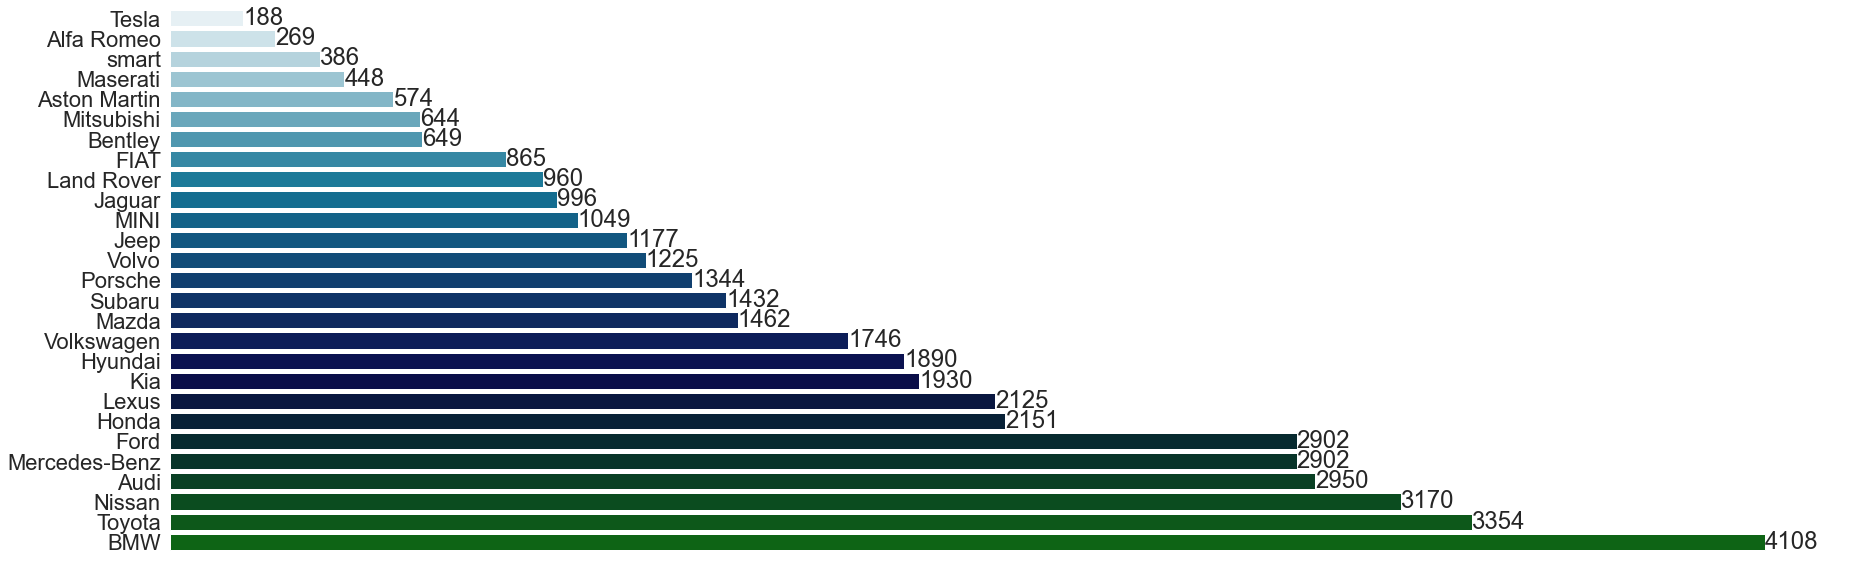

In [181]:

brands_count = pd.DataFrame(cars_df['brand'].value_counts())
brands_count['count'] = brands_count.index
brands_count.columns = ['count', 'brand']
brands_count = brands_count.sort_values(['count']).reset_index(drop=True)
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale = 2)

sns.set_style("white")
brands_plot = sns.barplot(y="brand", x="count", data=brands_count, palette="ocean_r")
brands_plot.set(xlabel='', ylabel='',xticklabels=[])
brands_plot.bar_label(brands_plot.containers[0])
sns.despine(left=True, bottom=True)
"""
result = brands_count.groupby(["brand"]).aggregate(np.median).reset_index().sort_values('index')
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale = 0.6)
#sns.countplot(x='count',data=brands_count ,palette= "ocean_r")
sns.histplot(data=brands_count['count'].sort_values(ascending=False)[0:27],palette= "ocean_r")
"""

<AxesSubplot:xlabel='car_type', ylabel='count'>

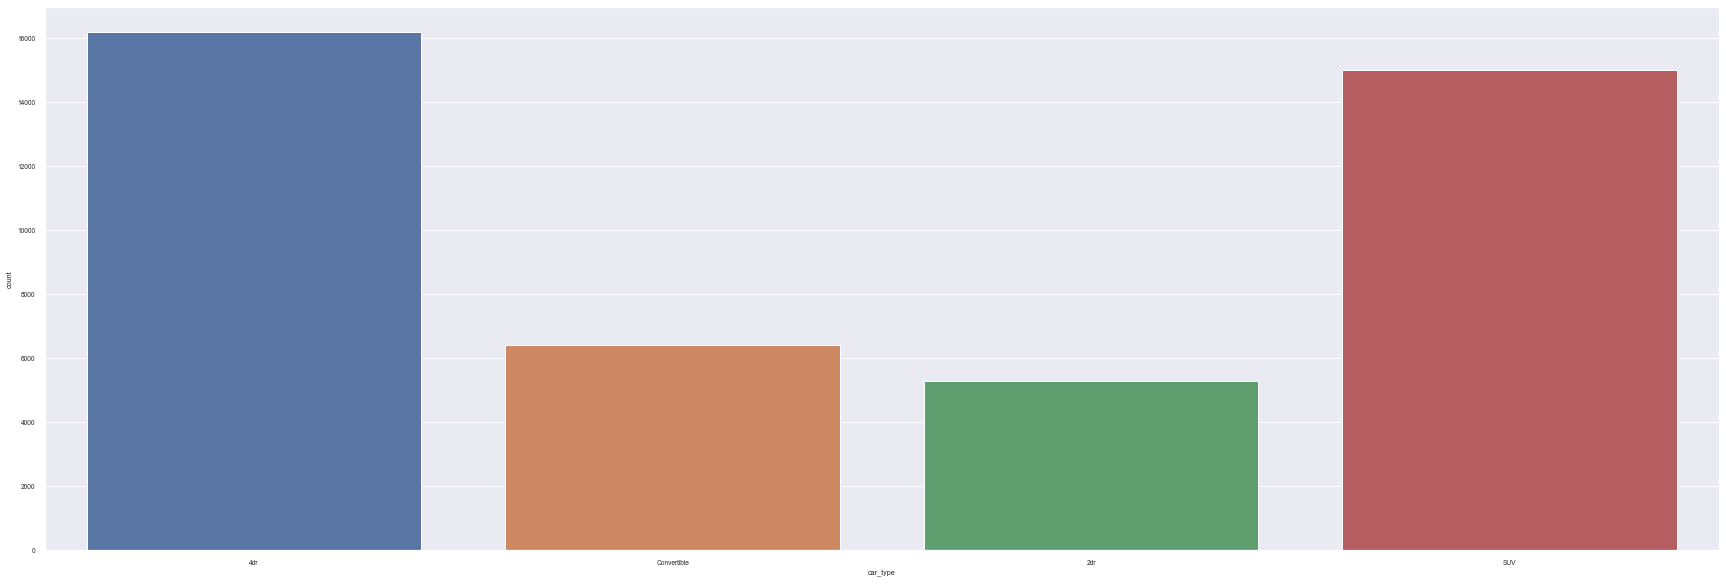

In [182]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale = 0.6)
sns.countplot(x='car_type',data=cars_df)

In [183]:

model_counts = pd.DataFrame(cars_df['model'].value_counts())

In [184]:

cars_df.drop(cars_df[cars_df['brand'] == 'import pandas as pd.py'].index, inplace = True)
cars_df.drop(cars_df[cars_df['brand'] == '.vscode'].index, inplace = True)

brands = cars_df.brand.unique()

labels = cars_df.sort_values('brand')

class_names = list(cars_df.brand.unique())

for i in class_names:
    os.makedirs(os.path.join('/Users/nicco/Desktop/ADA_project/test',i))



In [185]:
for c in class_names:
    for i in list(labels[labels['brand']==c]['img_id']):

        get_image = os.path.join('/Users/nicco/Desktop/ADA_project/cars dataset',i)       
        if not os.path.exists('/Users/nicco/Desktop/ADA_project/test/'+c+i):
            
            move_image_to_cat = shutil.copy(get_image,'/Users/nicco/Desktop/ADA_project/test/'+c)

In [186]:
# Here it is necessary to install splitfolder with pip 

#### input dataset that want to split
input_folder = '/Users/nicco/Desktop/ADA_project/test'  

output_folder= '/Users/nicco/Desktop/ADA_project/data_splitted'

splitfolders.ratio(input_folder, output= output_folder, seed=1337, ratio = (0.9, 0, 0.1))

In [187]:
# CNN

class_names = list(cars_df.brand.unique())

print(sorted(class_names))

class_names = ['Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'FIAT', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep',
'Kia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI', 'Mitsubishi', 'Nissan', 'Porsche', 'smart', 'Subaru', 'Tesla',
'Toyota', 'Volkswagen', 'Volvo']

nb_classes = len(class_names)

class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

resizing = (150,150)

['Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'FIAT', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart']


In [188]:
# CNN function that loads images for the split

def img_loading():
    split_directory = '/Users/nicco/Desktop/ADA_project/data_splitted'
    split_category = ["train", "test"]

    mod_img = []

    
    for category in split_category:
        path = os.path.join(split_directory, category)
        print(path)
        images = []
        labels = []

        print("Loading {}".format(category))

        for folder in os.listdir(path):
            if folder != '.DS_Store':
                label = class_names_label[folder]
                
                for file in os.listdir(os.path.join(path, folder)):

                    img_path = os.path.join(os.path.join(path, folder), file)
                    image = cv2.imread(img_path)
                    image = cv2.resize(image, resizing)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    images.append(image)
                    labels.append(label)
                    
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
            
        mod_img.append((images, labels))

    return mod_img



In [189]:
# CNN image splitting

(train_images, train_labels), (test_images, test_labels) = img_loading()

/Users/nicco/Desktop/ADA_project/data_splitted/train
Loading train
/Users/nicco/Desktop/ADA_project/data_splitted/test
Loading test


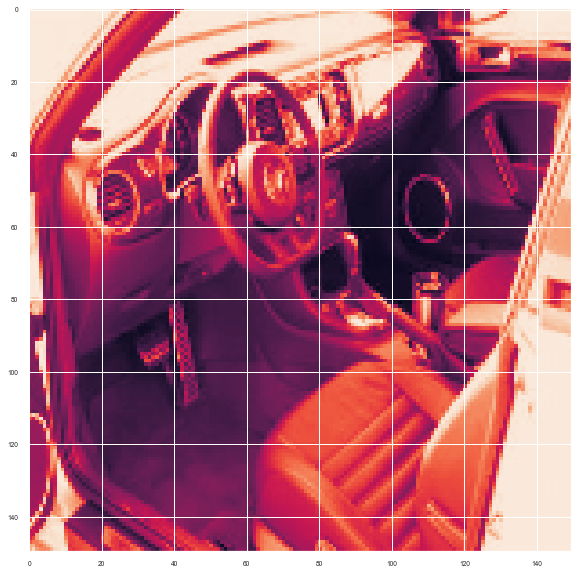

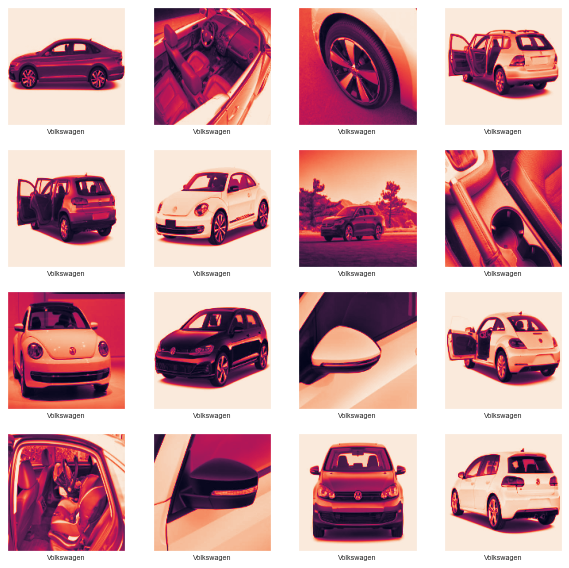

In [190]:
# Sample of a modeled image just before cnn process 

plt.imshow(test_images[15])
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [191]:
# Fits the image shape with the number of channels for the CNN

#train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
train_images = train_images.reshape(-1,150,150,1)
test_images = test_images.reshape(-1,150,150,1)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((30016, 150, 150, 1), (12880, 150, 150, 1), (30016,), (12880,))

In [192]:
# CNN model building



cnn_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid',input_shape = (150, 150, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = tf.nn.relu),
  tf.keras.layers.Dense(27, activation = tf.nn.softmax)
])


# Establishes further parameters such as optimizer, metrics etc...

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# cnn model summary

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_9 (Dense)              (None, 27)               

In [193]:
# CNN model fitting, we throw our train images into the model: COMPUTATION TIME on macbook air no M1 cheaped: ~24mins

cars_fit = cnn_model.fit(train_images, train_labels, batch_size = 128, epochs = 5, validation_split=0.1, shuffle=True)


Train on 21011 samples, validate on 9005 samples
Epoch 1/5
21011/21011 [==============================] - 180s 9ms/sample - loss: 32.1751 - accuracy: 0.1805 - val_loss: 10.5681 - val_accuracy: 0.0024
Epoch 2/5
21011/21011 [==============================] - 148s 7ms/sample - loss: 1.8269 - accuracy: 0.4686 - val_loss: 14.9341 - val_accuracy: 0.0087
Epoch 3/5
21011/21011 [==============================] - 164s 8ms/sample - loss: 1.0125 - accuracy: 0.7019 - val_loss: 21.1625 - val_accuracy: 0.0097
Epoch 4/5
21011/21011 [==============================] - 166s 8ms/sample - loss: 0.4823 - accuracy: 0.8615 - val_loss: 26.9196 - val_accuracy: 0.0130
Epoch 5/5
21011/21011 [==============================] - 149s 7ms/sample - loss: 0.2228 - accuracy: 0.9433 - val_loss: 35.6004 - val_accuracy: 0.0113


In [194]:
#

#test_loss = cnn_model.evaluate(test_images, test_labels)
print(cars_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [195]:
# We put test the model with the test set

pred = cnn_model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

In [196]:
# Final summary of the model trained and tested.

brands = ['Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'FIAT', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia',
'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI', 'Mitsubishi', 'Nissan', 'Porsche', 'smart', 'Subaru', 'Tesla', 'Toyota',
'Volkswagen', 'Volvo']

print(classification_report(test_labels, pred_labels, target_names = brands))


               precision    recall  f1-score   support

   Alfa Romeo       0.00      0.00      0.00        81
 Aston Martin       0.00      0.00      0.00       173
         Audi       0.29      0.52      0.37       885
      Bentley       0.24      0.24      0.24       195
          BMW       0.00      0.00      0.00      1233
         FIAT       0.00      0.00      0.00       260
         Ford       0.32      0.55      0.41       871
        Honda       0.00      0.00      0.00       646
      Hyundai       0.32      0.49      0.39       567
       Jaguar       0.00      0.00      0.00       299
         Jeep       0.56      0.66      0.61       354
          Kia       0.32      0.44      0.37       579
   Land Rover       0.32      0.39      0.35       288
        Lexus       0.40      0.60      0.48       638
     Maserati       0.00      0.00      0.00       135
        Mazda       0.39      0.53      0.45       439
Mercedes-Benz       0.00      0.00      0.00       871
         

/opt/anaconda3/envs/ADA/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/ADA/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/ADA/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


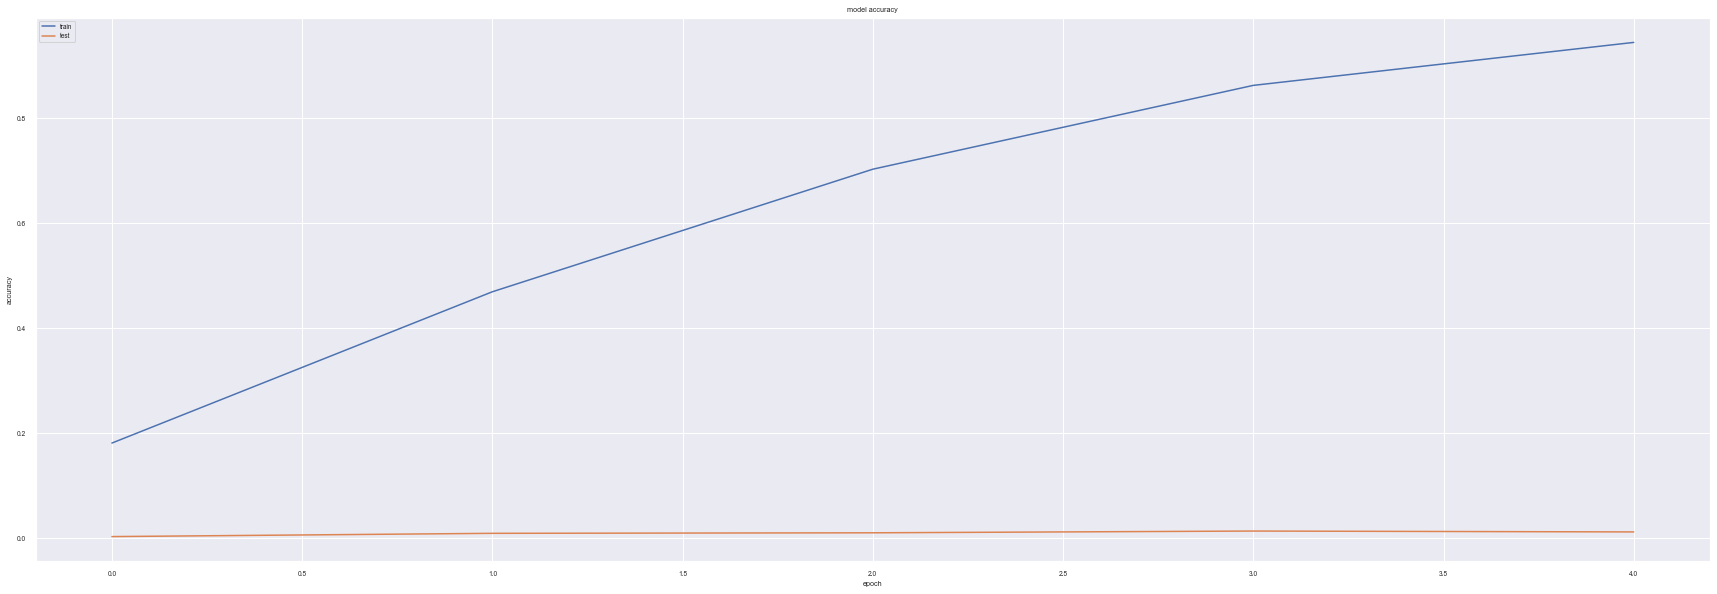

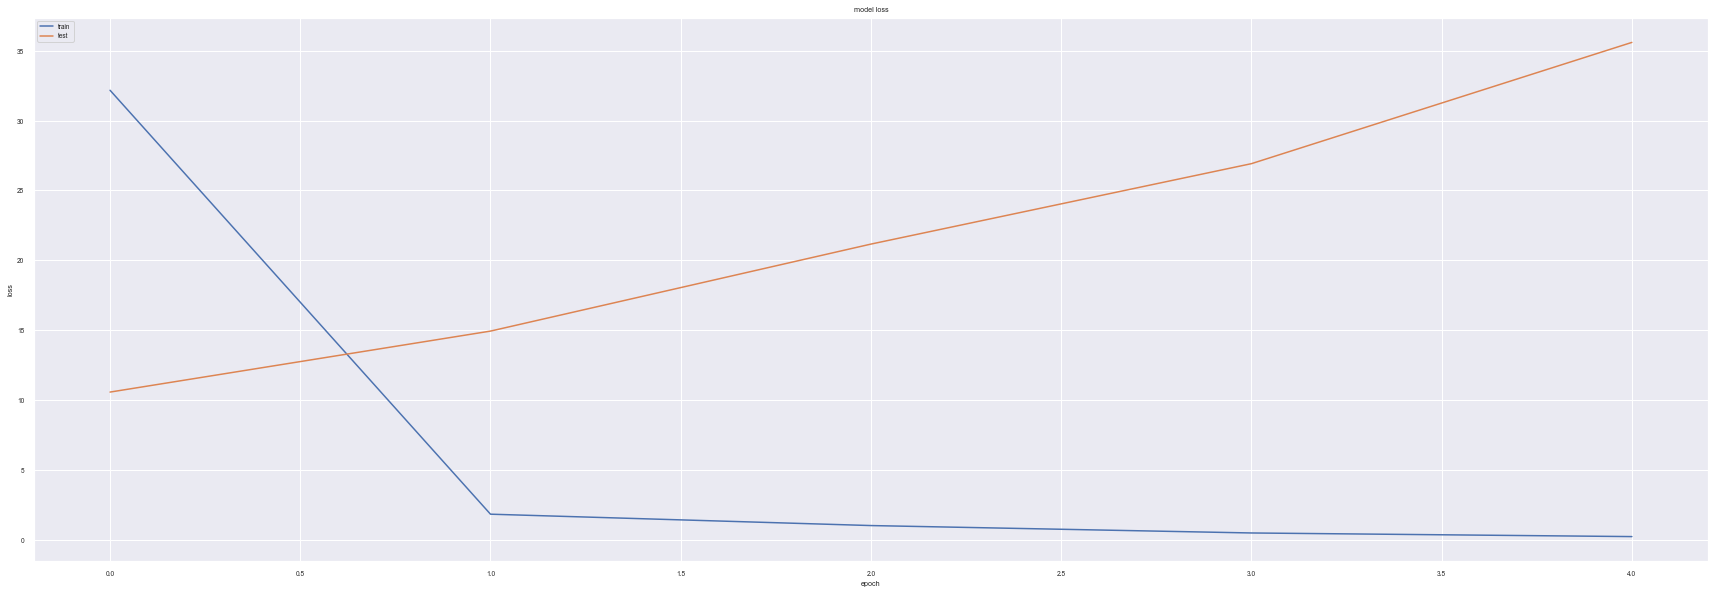

In [197]:
#Accuracy train and test

plt.plot(cars_fit.history['accuracy'])
plt.plot(cars_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Loss train and test
plt.plot(cars_fit.history['loss'])
plt.plot(cars_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [198]:
### FOR IVAN ### Tried to design new

#Define a switch that will take the index of class_names and return the car brand in string.
#!!!ATTENTION!!! je n'ai pas réussi à l'appliquer pour le ndarray obtenu dans le model

#class_names est la list contenant les marques de voitures dans l'ordre alphabétique.
#Le CNN classifie les voitures de 0 à 26, class names reprend cet index et y attribue une marque correspondante en ordre alphabétique/numérique): 0= Alpha Romeo -> 26= Volvo




def brand_id(x):

    brand_name = []

    brand_name.append(class_names[x])

    print(brand_name)




#testing with new inputs:

newimages = []

new_input_path = os.path.join("/Users/nicco/Desktop/ADA_project/new_input/2017_Fiat_500X_POP_Star_Multiair_1.4_Front.jpg")

#new input resize and reshape:
new_image = cv2.imread(new_input_path)
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
new_image = cv2.resize(new_image, resizing)
newimages.append(new_image)
newimages = np.array(newimages, dtype = 'float32')
new_inputs = newimages.reshape(-1,150,150,1)

# new input into the model
new_pred = cnn_model.predict(new_inputs)
new_pred_labels = np.argmax(new_pred, axis=1)

print(new_pred_labels)

#print(brand_id(new_pred_labels))


[ WARN:0@34719.354] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/nicco/Desktop/ADA_project/new_input/2017_Fiat_500X_POP_Star_Multiair_1.4_Front.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
